In [19]:
import time

print("Session keeper started. This cell will run FOREVER until you stop it manually.")
print("Press the ■ Stop button in Kaggle when you return to end it.")

try:
    while True:
        print(f"Session active. Last update: {time.ctime()}")  # Print current time
        time.sleep(180)  # Sleep for 60 seconds (adjust if needed)
except KeyboardInterrupt:
    print("\nSession keeper stopped by user. Your variables are still intact!")

Session keeper started. This cell will run FOREVER until you stop it manually.
Press the ■ Stop button in Kaggle when you return to end it.
Session active. Last update: Mon Jun  9 15:03:36 2025

Session keeper stopped by user. Your variables are still intact!


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re

# read datasets
train = pd.read_csv('/kaggle/input/ai-2-dl-for-nlp-2025-homework-3/train_dataset.csv')
validation = pd.read_csv('/kaggle/input/ai-2-dl-for-nlp-2025-homework-3/val_dataset.csv')
test = pd.read_csv('/kaggle/input/ai-2-dl-for-nlp-2025-homework-3/test_dataset.csv')

# print(list(train.index))

# clean dataframes from duplicate tweets and rows with null/nan values
train = train.drop_duplicates(subset='Text').dropna()
validation = validation.drop_duplicates(subset='Text').dropna()
test = test.drop_duplicates(subset='Text').dropna()

Total training tweets: 148388

Positive training tweets(1): 74196

Negative training tweets(0): 74192



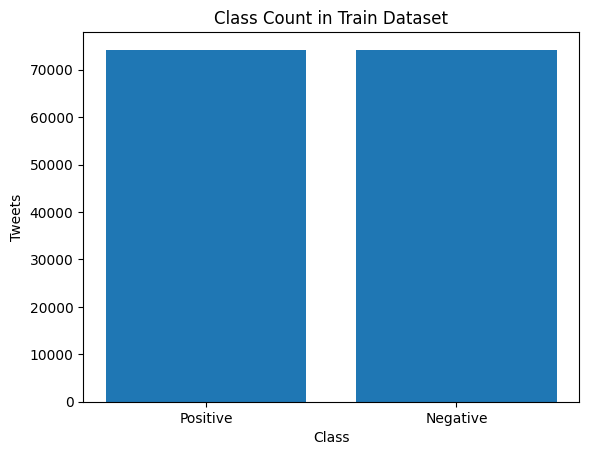

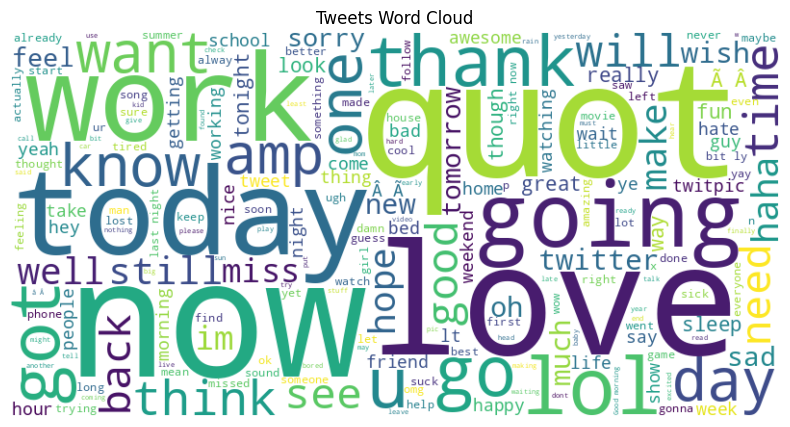

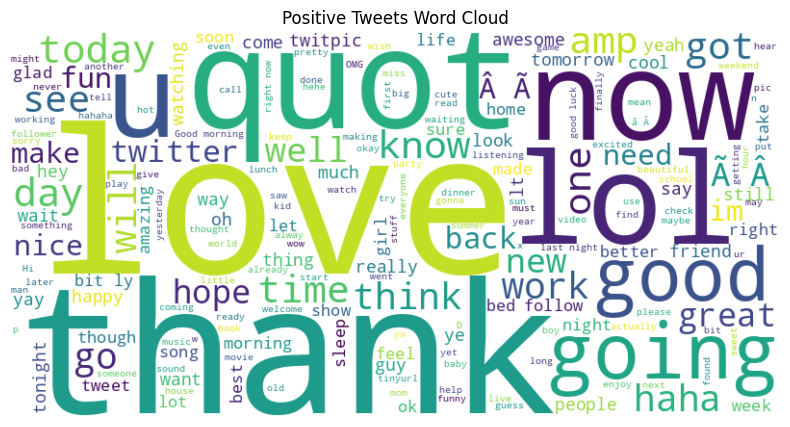

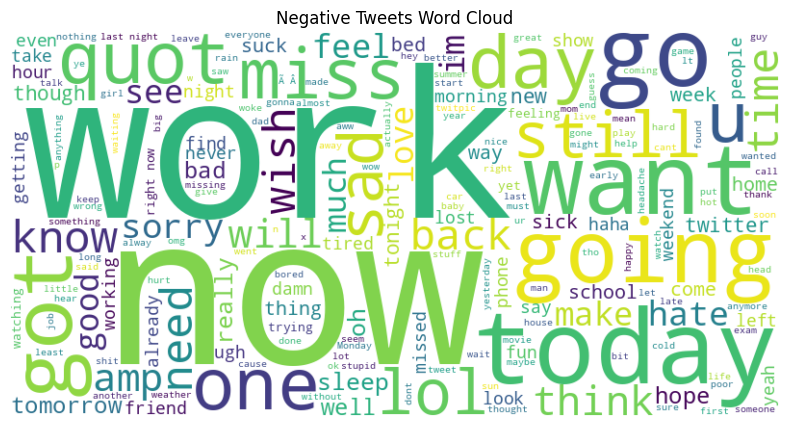



Average tweet word count: 14
Max tweet word count: 269
Min tweet word count: 1
Standard deviation of tweet word count: 7.502500158507599



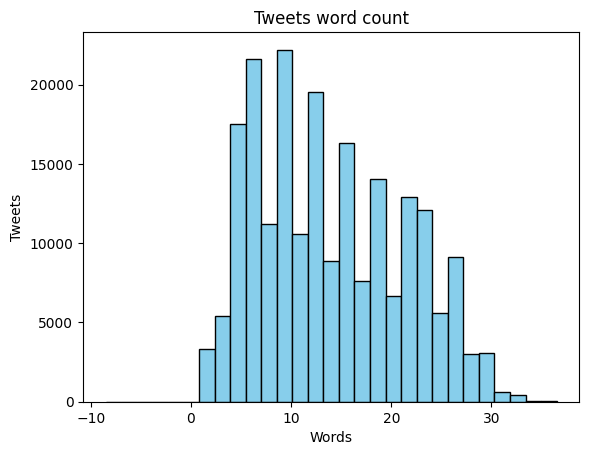

Average positive tweet word count: 14
Max positive tweet word count: 269
Min positive tweet word count: 1
Standard deviation of positive tweet word count: 7.53348925151386



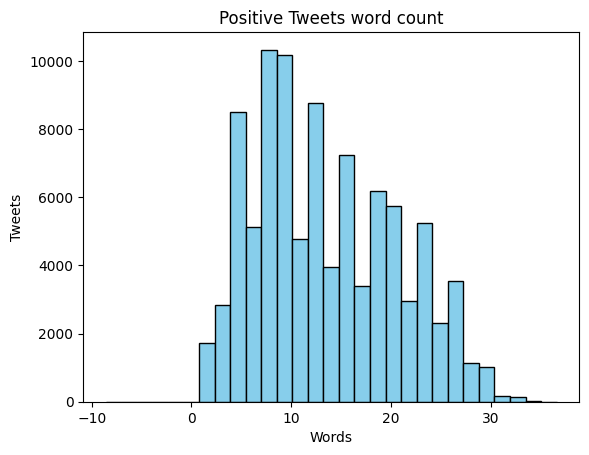

Average negative tweet word count: 14
Max negative tweet word count: 155
Min negative tweet word count: 1
Standard deviation of negative tweet word count: 7.45811431333745



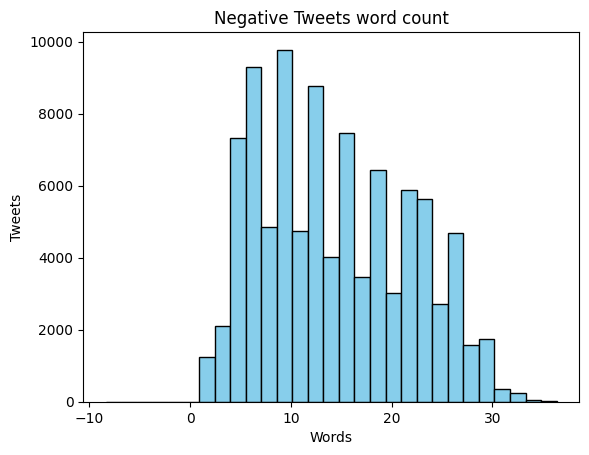

In [4]:
# Exploratory Data Analysis (EDA) (Same as in Project-1)
# Statistics measured: class count, wordclouds gen pos neg, (most common bigrams gen pos neg), lengths statistics gen pos neg, (stopword frequency gen pos neg)

# count positive vs negative tweets in the training data won't make the model biased towards a class, plot them with a barchart
rows = len(train.index)
positives = list(train['Label']).count(1)
negatives = list(train['Label']).count(0)

print(f'Total training tweets: {rows}\n')
print(f'Positive training tweets(1): {positives}\n')
print(f'Negative training tweets(0): {negatives}\n')

category = ['Positive', 'Negative']
count = [positives, negatives]

plt.bar(category, count)
plt.title('Class Count in Train Dataset')
plt.xlabel('Class')
plt.ylabel('Tweets')
plt.show()


# make a wordcloud from all the datasets combined to see the most common words in tweets generally
combined = pd.concat([train,validation,test], ignore_index=True) #combine the datasets in a single dataframe
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(combined['Text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Tweets Word Cloud')
plt.axis('off')
plt.show()
print(f'\n')

# now get the datasets that have answers for tweets' classes
train_and_val = pd.concat([train,validation], ignore_index=True)

# make 2 dataframes containing rows of only one sentiment
positive_tweets = train_and_val[train_and_val['Label'] == 1]
negative_tweets = train_and_val[train_and_val['Label'] == 0]

# make wordclouds for positive and negative tweets seperately

    # positive tweets wordcloud
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_tweets['Text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Positive Tweets Word Cloud')
plt.axis('off')
plt.show()
print(f'\n')

    # negative tweets wordcloud
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negative_tweets['Text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Negative Tweets Word Cloud')
plt.axis('off')
plt.show()
print(f'\n')

# for all tweets, and then for positive vs negative tweets, find average, maximum and minimum word count
def len_stat(df, lengths):
    max_words = float('-inf')
    min_words = float('inf')
    sum_words = 0
    for tweet in df['Text']:
        word_count = len( re.findall(r'\w+', tweet) ) #using regular expression that finds all the strings containing only word characters
        lengths.append(word_count)
        sum_words += word_count
        if word_count > max_words:
            max_words = word_count
        if word_count < min_words:
            min_words = word_count
    average = sum_words / (len(df.index))
    return max_words, min_words, round(average), lengths

def plot_histogram(data, average, xl, yl, title):
    std_dev = np.std(data)
    # plt.xlim(average - 3*std_dev, average + 3*std_dev)
    bins_loc = np.linspace(average - 3*std_dev, average + 3*std_dev, 30)  # 30 bins centered around the mean
    plt.hist(data, bins=bins_loc, color='skyblue', edgecolor='black')
    plt.xlabel(xl)
    plt.ylabel(yl)
    plt.title(title)
    plt.show()

max_len, min_len, av_len, lengths = len_stat(combined, [])
print(f'Average tweet word count: {av_len}\nMax tweet word count: {max_len}\nMin tweet word count: {min_len}\nStandard deviation of tweet word count: {np.std(lengths)}\n')
plot_histogram(lengths, av_len, 'Words' ,'Tweets' ,'Tweets word count')

max_len_pos, min_len_pos, av_len_pos, lengths_pos = len_stat(positive_tweets, [])
print(f'Average positive tweet word count: {av_len_pos}\nMax positive tweet word count: {max_len_pos}\nMin positive tweet word count: {min_len_pos}\nStandard deviation of positive tweet word count: {np.std(lengths_pos)}\n')
plot_histogram(lengths_pos, av_len_pos,'Words' ,'Tweets' ,'Positive Tweets word count')

max_len_neg, min_len_neg, av_len_neg, lengths_neg = len_stat(negative_tweets, [])
print(f'Average negative tweet word count: {av_len_neg}\nMax negative tweet word count: {max_len_neg}\nMin negative tweet word count: {min_len_neg}\nStandard deviation of negative tweet word count: {np.std(lengths_neg)}\n')
plot_histogram(lengths_neg, av_len_neg, 'Words' ,'Tweets' ,'Negative Tweets word count')

In [5]:
# Preprocessing

import re

# --- 1) Cleaning functions ---
def normalize_slang(text):
    text = text.lower()
    slang_patterns = {
        r'\bluv\b': 'love',
        r'\bchilin\b': 'chilling',
        r'\bfav\b': 'favourite',
        r'\bmileycyrus\b': 'miley cyrus',
        r'\bloves\b': 'love',
        r'\bhates\b': 'hate',
        r'\bstressed\b': 'stress',
        r'\bstressing\b': 'stress',
        r'\b(a*ha)+h*\b': 'haha'
    }
    for pattern, replacement in slang_patterns.items():
        text = re.sub(pattern, replacement, text)
    return text

def remove_urls(text):
    return re.sub(r'https?://\S+|www\.\S+', '', text)

def remove_mentions(text):
    return re.sub(r'@\w+', '', text)

def lowercase(text):
    return text.lower()

def remove_special_chars(text):
    # keep letters, numbers, basic punctuation; remove others
    return re.sub(r'[^a-zA-Z0-9\s.,!?\'"]+', '', text)

def reduce_repeats(text):
    # replace 3+ repeating letters with 2 (loooove → loove)
    return re.sub(r'(.)\1{2,}', r'\1\1', text)

# --- 2) Preprocess wrapper with flags ---
def preprocess_text(text,
                    do_lowercase=True,
                    drop_urls=True,
                    drop_mentions=True,
                    drop_special=True,
                    reduce_repeat_chars=True,
                    correct_slang=True):
    if drop_urls:
        text = remove_urls(text)
    if drop_mentions:
        text = remove_mentions(text)
    if do_lowercase:
        text = lowercase(text)
    if drop_special:
        text = remove_special_chars(text)
    if reduce_repeat_chars:
        text = reduce_repeats(text)
    if correct_slang:
        text = normalize_slang(text)
    # collapse extra whitespace
    return re.sub(r'\s+', ' ', text).strip()

# --- 3) Apply to datasets ---
# You can toggle these flags later to experiment
flags = {
    "do_lowercase":         True,
    "drop_urls":            True,
    "drop_mentions":        True,
    "drop_special":         False,
    "reduce_repeat_chars":  True,
    "correct_slang" :     True,
}

for df in [train, validation, test]:
    df['Text_clean'] = df['Text'].apply(lambda x: preprocess_text(x, **flags))

In [6]:
# Install just Transformers (and the tokenizers dependency)
!pip install --upgrade --quiet transformers tokenizers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 89.3 MB/s eta 0:00:00:00:01:01


Train+Val sample size: 190784 tweets
Word-count statistics on cleaned tweets:
  Mean: 12.8
  Median: 12.0
  90th percentile: 23
  95th percentile: 25
  Max: 110


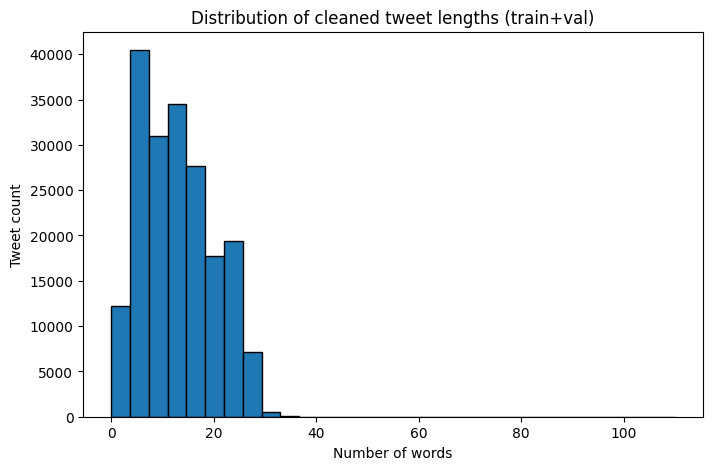

In [7]:
# Token Length Analysis

import numpy as np
import matplotlib.pyplot as plt

# Compute lengths
lengths = train['Text_clean'].apply(lambda t: len(t.split()))
print(f"Train+Val sample size: {len(train) + len(validation)} tweets")

# Combine train+val for analysis
combined_len = pd.concat([train['Text_clean'], validation['Text_clean']], ignore_index=True)
lengths = combined_len.apply(lambda t: len(t.split()))

# Stats
print("Word-count statistics on cleaned tweets:")
print(f"  Mean: {lengths.mean():.1f}")
print(f"  Median: {lengths.median():.1f}")
print(f"  90th percentile: {lengths.quantile(0.90):.0f}")
print(f"  95th percentile: {lengths.quantile(0.95):.0f}")
print(f"  Max: {lengths.max()}")

# Plot histogram (bins=30)
plt.figure(figsize=(8,5))
plt.hist(lengths, bins=30, edgecolor='k')
plt.xlabel("Number of words")
plt.ylabel("Tweet count")
plt.title("Distribution of cleaned tweet lengths (train+val)")
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

# 10% stratified sample of train only
train_small, _ = train_test_split(
    train,
    train_size=0.1,
    stratify=train['Label'],
    random_state=42
)

# 10% stratified sample of validation only
val_small, _ = train_test_split(
    validation,
    train_size=0.1,
    stratify=validation['Label'],
    random_state=42
)

print(f"Train small size: {len(train_small)}, Val small size: {len(val_small)}")

Train small size: 14838, Val small size: 4239


In [9]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizerFast

# 1) Settings for prototype
MAX_LENGTH = 32            # very fast prototyping (max length is the power of 2 next from the 95-th percentile)
BATCH_SIZE = 16
MODEL_NAME = "bert-base-uncased"

# 2) Load tokenizer
tokenizer = BertTokenizerFast.from_pretrained(MODEL_NAME)

# 3) Define Dataset
class SentimentDataset(Dataset):
    def __init__(self, df, tokenizer, max_length):
        self.texts  = df['Text_clean'].tolist()
        self.labels = df['Label'].tolist()
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encoding = self.tokenizer(
            self.texts[idx],
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt'
        )
        return {
            'input_ids':      encoding['input_ids'].squeeze(),
            'attention_mask': encoding['attention_mask'].squeeze(),
            'labels':         torch.tensor(self.labels[idx], dtype=torch.long)
        }

# 4) Build datasets on your train_small & val_small
train_dataset = SentimentDataset(train_small, tokenizer, MAX_LENGTH)
val_dataset   = SentimentDataset(val_small,   tokenizer, MAX_LENGTH)

# 5) Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader   = DataLoader(val_dataset,   batch_size=BATCH_SIZE)

print(f"✔️ Train batches: {len(train_loader)}, Val batches: {len(val_loader)}")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

✔️ Train batches: 928, Val batches: 265


In [10]:
import torch
print("GPU available:", torch.cuda.is_available())

GPU available: True


In [11]:
# Prototype Training Loop (1 Epoch)

import torch
from transformers import BertForSequenceClassification, get_linear_schedule_with_warmup
from torch.optim import AdamW
from torch.cuda.amp import autocast, GradScaler
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# 1) Model & device
device = torch.device("cuda")
model = BertForSequenceClassification.from_pretrained(
    MODEL_NAME,
    num_labels=2
).to(device)

# 2) Optimizer & Scheduler
optimizer = AdamW(model.parameters(), lr=2e-5)
total_steps = len(train_loader) * 1  # 1 epoch
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=int(0.1 * total_steps),
    num_training_steps=total_steps
)

# 3) Mixed-precision scaler
scaler = GradScaler()

# 4) Training loop (1 epoch)
model.train()
train_losses = []
for batch in train_loader:
    optimizer.zero_grad()
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    labels = batch['labels'].to(device)

    with autocast():
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss

    scaler.scale(loss).backward()
    scaler.step(optimizer)
    scaler.update()
    scheduler.step()

    train_losses.append(loss.item())

print(f"Train → Mean loss: {sum(train_losses)/len(train_losses):.4f}")

# 5) Validation pass
model.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for batch in val_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)

        all_preds.extend(preds.cpu().tolist())
        all_labels.extend(labels.cpu().tolist())

acc = accuracy_score(all_labels, all_preds)
prec, rec, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='binary')
print(f"Val → Accuracy: {acc:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f} | F1: {f1:.4f}")

2025-06-09 13:31:33.210139: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749475893.370529      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749475893.419807      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_35/3968988842.py:26: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
/tmp/ipykernel_35/3968988842.py:37: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Train → Mean loss: 0.4513
Val → Accuracy: 0.8259 | Precision: 0.8244 | Recall: 0.8283 | F1: 0.8264


In [ ]:
# ─── Small-Sample Split & DataLoaders ───
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader

# 1) Create 10% stratified splits of train and validation
train_small, _ = train_test_split(
    train,
    train_size=0.10,
    stratify=train['Label'],
    random_state=42
)
val_small, _ = train_test_split(
    validation,
    train_size=0.10,
    stratify=validation['Label'],
    random_state=42
)

print(f"train_small: {len(train_small)}, val_small: {len(val_small)}")

# 2) Tokenizer (make sure MODEL_NAME is set to your distilbert model)
tokenizer = BertTokenizerFast.from_pretrained(MODEL_NAME)

# 3) DataLoaders for Experiments phase
train_ld = DataLoader(
    SentimentDataset(train_small, tokenizer, ML),
    batch_size=BS,
    shuffle=True
)
val_ld = DataLoader(
    SentimentDataset(val_small, tokenizer, ML),
    batch_size=BS
)

# Experiments

In [1]:
# ─── Cell 1: Experiments —  Single-Epoch on 10% Sample ───
import torch
from torch.optim import AdamW
from transformers import BertConfig, BertForSequenceClassification, get_linear_schedule_with_warmup, BertTokenizerFast
from torch.cuda.amp import autocast, GradScaler
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from torch.utils.data import DataLoader

# Settings fixed for experiments
DEVICE      = torch.device("cuda")
LR          = 5e-5
BS          = 16
ML          = 64
EPOCHS      = 1


variants = [
    {"wd": 0.0,   "drop": 0.1, "sched": "linear", "hidden": False},
    {"wd": 0.01,  "drop": 0.1, "sched": "linear", "hidden": False},
    {"wd": 0.01,  "drop": 0.2, "sched": "linear", "hidden": False},
    {"wd": 0.01,  "drop": 0.2, "sched": "cosine", "hidden": False},
    {"wd": 0.01,  "drop": 0.2, "sched": "linear", "hidden": True},   # hidden-layer experiment
]

results = []

print("▶️ Running architectural experiments (5 variants)…")
for v in variants:
    print(f"→ Variant wd={v['wd']}, drop={v['drop']}, sched={v['sched']}, hidden={v['hidden']}")
    # 1) Build config
    config = BertConfig.from_pretrained(
        MODEL_NAME,
        hidden_dropout_prob=v['drop'],
        attention_probs_dropout_prob=v['drop'],
        num_labels=2
    )
    model = BertForSequenceClassification.from_pretrained(
        MODEL_NAME, config=config
    ).to(DEVICE)

    # 1b) If hidden-layer variant, overwrite the classifier head
    if v["hidden"]:
        import torch.nn as nn
        # half-size hidden layer
        inter = config.hidden_size // 2
        model.classifier = nn.Sequential(
            nn.Linear(config.hidden_size, inter),
            nn.ReLU(),
            nn.Dropout(config.hidden_dropout_prob),
            nn.Linear(inter, config.num_labels),
        ).to(DEVICE)

    # 2) Optimizer & scheduler
    optim = AdamW(model.parameters(), lr=LR, weight_decay=v['wd'])
    total_steps = len(train_ld) * EPOCHS
    if v['sched']=="linear":
        sched = get_linear_schedule_with_warmup(optim, int(0.1*total_steps), total_steps)
    else:
        sched = torch.optim.lr_scheduler.CosineAnnealingLR(optim, T_max=total_steps)
    scaler = GradScaler()

    # 3) Train 1 epoch
    model.train()
    for batch in train_ld:
        optim.zero_grad()
        ids   = batch['input_ids'].to(DEVICE)
        mask  = batch['attention_mask'].to(DEVICE)
        labs  = batch['labels'].to(DEVICE)
        with autocast():
            loss = model(ids, attention_mask=mask, labels=labs).loss
        scaler.scale(loss).backward()
        scaler.step(optim); scaler.update()
        if v['sched']=="linear": sched.step()
        else: sched.step()

    # 4) Validate
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for batch in val_ld:
            logits = model(
                batch['input_ids'].to(DEVICE),
                attention_mask=batch['attention_mask'].to(DEVICE)
            ).logits
            preds = torch.argmax(logits, dim=1)
            all_preds.extend(preds.cpu().tolist())
            all_labels.extend(batch['labels'].tolist())

    acc = accuracy_score(all_labels, all_preds)
    prec, rec, f1, _ = precision_recall_fscore_support(
        all_labels, all_preds, average='binary'
    )
    print(f" ↳ Acc={acc:.4f}, P={prec:.4f}, R={rec:.4f}, F1={f1:.4f}\n")
    results.append({**v, "acc":acc, "prec":prec, "rec":rec, "f1":f1})

# Display updated experiments table
exp_df = pd.DataFrame(results)
display(exp_df.sort_values("f1", ascending=False))

2025-06-09 18:27:41.391871: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749493661.674609      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749493661.782297      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


▶️ Running architectural experiments (5 variants)…
→ Variant wd=0.0, drop=0.1, sched=linear, hidden=False


NameError: name 'MODEL_NAME' is not defined

### We try a bit more experiments with hidden = True since it increased accuracy

In [25]:
variants = [
    {"wd": 0.0,   "drop": 0.1, "sched": "linear", "hidden": True},
    {"wd": 0.01,  "drop": 0.1, "sched": "linear", "hidden": True},
    {"wd": 0.01,  "drop": 0.2, "sched": "linear", "hidden": True},
    {"wd": 0.01,  "drop": 0.2, "sched": "cosine", "hidden": True},
]

print("▶️ Running architectural experiments (5 variants)…")
for v in variants:
    print(f"→ Variant wd={v['wd']}, drop={v['drop']}, sched={v['sched']}, hidden={v['hidden']}")
    # 1) Build config
    config = BertConfig.from_pretrained(
        MODEL_NAME,
        hidden_dropout_prob=v['drop'],
        attention_probs_dropout_prob=v['drop'],
        num_labels=2
    )
    model = BertForSequenceClassification.from_pretrained(
        MODEL_NAME, config=config
    ).to(DEVICE)

    # 1b) If hidden-layer variant, overwrite the classifier head
    if v["hidden"]:
        import torch.nn as nn
        # half-size hidden layer
        inter = config.hidden_size // 2
        model.classifier = nn.Sequential(
            nn.Linear(config.hidden_size, inter),
            nn.ReLU(),
            nn.Dropout(config.hidden_dropout_prob),
            nn.Linear(inter, config.num_labels),
        ).to(DEVICE)

    # 2) Optimizer & scheduler
    optim = AdamW(model.parameters(), lr=LR, weight_decay=v['wd'])
    total_steps = len(train_ld) * EPOCHS
    if v['sched']=="linear":
        sched = get_linear_schedule_with_warmup(optim, int(0.1*total_steps), total_steps)
    else:
        sched = torch.optim.lr_scheduler.CosineAnnealingLR(optim, T_max=total_steps)
    scaler = GradScaler()

    # 3) Train 1 epoch
    model.train()
    for batch in train_ld:
        optim.zero_grad()
        ids   = batch['input_ids'].to(DEVICE)
        mask  = batch['attention_mask'].to(DEVICE)
        labs  = batch['labels'].to(DEVICE)
        with autocast():
            loss = model(ids, attention_mask=mask, labels=labs).loss
        scaler.scale(loss).backward()
        scaler.step(optim); scaler.update()
        if v['sched']=="linear": sched.step()
        else: sched.step()

    # 4) Validate
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for batch in val_ld:
            logits = model(
                batch['input_ids'].to(DEVICE),
                attention_mask=batch['attention_mask'].to(DEVICE)
            ).logits
            preds = torch.argmax(logits, dim=1)
            all_preds.extend(preds.cpu().tolist())
            all_labels.extend(batch['labels'].tolist())

    acc = accuracy_score(all_labels, all_preds)
    prec, rec, f1, _ = precision_recall_fscore_support(
        all_labels, all_preds, average='binary'
    )
    print(f" ↳ Acc={acc:.4f}, P={prec:.4f}, R={rec:.4f}, F1={f1:.4f}\n")
    results.append({**v, "acc":acc, "prec":prec, "rec":rec, "f1":f1})

# Display updated experiments table
exp_df = pd.DataFrame(results)
display(exp_df.sort_values("f1", ascending=False))

▶️ Running architectural experiments (5 variants)…
→ Variant wd=0.0, drop=0.1, sched=linear, hidden=True


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_35/2608012364.py:41: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
/tmp/ipykernel_35/2608012364.py:50: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


 ↳ Acc=0.8257, P=0.8403, R=0.8042, F1=0.8219

→ Variant wd=0.01, drop=0.1, sched=linear, hidden=True


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_35/2608012364.py:41: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
/tmp/ipykernel_35/2608012364.py:50: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


 ↳ Acc=0.8297, P=0.8397, R=0.8151, F1=0.8272

→ Variant wd=0.01, drop=0.2, sched=linear, hidden=True


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_35/2608012364.py:41: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
/tmp/ipykernel_35/2608012364.py:50: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


 ↳ Acc=0.8266, P=0.8309, R=0.8203, F1=0.8255

→ Variant wd=0.01, drop=0.2, sched=cosine, hidden=True


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_35/2608012364.py:41: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
/tmp/ipykernel_35/2608012364.py:50: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


 ↳ Acc=0.8162, P=0.8141, R=0.8198, F1=0.8169



,wd,drop,sched,acc,prec,rec,f1,hidden
8,0.01,0.2,linear,0.830149,0.824374,0.839151,0.831697,True
4,0.00,0.1,linear,0.827082,0.825740,0.829245,0.827489,False
10,0.01,0.1,linear,0.829677,0.839650,0.815094,0.827190,True
0,0.00,0.1,linear,0.826846,0.829060,0.823585,0.826313,NaN
11,0.01,0.2,linear,0.826610,0.830865,0.820283,0.825540,True
9,0.00,0.1,linear,0.825666,0.840315,0.804245,0.821885,True
1,0.01,0.1,linear,0.821420,0.822527,0.819811,0.821167,NaN
7,0.01,0.2,cosine,0.823307,0.838519,0.800943,0.819300,False
6,0.01,0.2,linear,0.820241,0.824260,0.814151,0.819174,False
2,0.01,0.2,linear,0.823779,0.846542,0.791038,0.817849,NaN


# Fine Tuning

In [26]:
# Fine-Tuning Grid on the Hidden-Layer Variant (15,5 min)

import torch
from torch.optim import AdamW
from transformers import BertConfig, BertForSequenceClassification, get_linear_schedule_with_warmup, BertTokenizerFast
from torch.cuda.amp import autocast, GradScaler
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.model_selection import ParameterGrid
from torch.utils.data import DataLoader
import pandas as pd

# 1) Hidden-layer variant settings
BEST_WD    = 0.01
BEST_DROP  = 0.2
BEST_SCHED = "linear"

# 2) Build config once
config = BertConfig.from_pretrained(
    MODEL_NAME,
    hidden_dropout_prob=BEST_DROP,
    attention_probs_dropout_prob=BEST_DROP,
    num_labels=2
)

# 3) Hyperparameter grid
param_grid = {
    "lr":         [2e-5, 3e-5, 5e-5],
    "batch_size":[16, 32],
    "max_length":[32, 64],
}

def run_ft(lr, batch_size, max_length):
    tokenizer = BertTokenizerFast.from_pretrained(MODEL_NAME)
    train_ds = SentimentDataset(train_small, tokenizer, max_length)
    val_ds   = SentimentDataset(val_small,   tokenizer, max_length)
    train_ld = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
    val_ld   = DataLoader(val_ds,   batch_size=batch_size)

    model = BertForSequenceClassification.from_pretrained(MODEL_NAME, config=config).to(DEVICE)
    # Overwrite head for hidden-layer
    import torch.nn as nn
    inter = config.hidden_size // 2
    model.classifier = nn.Sequential(
        nn.Linear(config.hidden_size, inter),
        nn.ReLU(),
        nn.Dropout(BEST_DROP),
        nn.Linear(inter, config.num_labels),
    ).to(DEVICE)

    optim = AdamW(model.parameters(), lr=lr, weight_decay=BEST_WD)
    total_steps = len(train_ld)
    if BEST_SCHED=="linear":
        sched = get_linear_schedule_with_warmup(optim, int(0.1*total_steps), total_steps)
    else:
        sched = torch.optim.lr_scheduler.CosineAnnealingLR(optim, T_max=total_steps)
    scaler = GradScaler()

    # Train 1 epoch
    model.train()
    for batch in train_ld:
        optim.zero_grad()
        ids, mask, labs = (batch[k].to(DEVICE) for k in ['input_ids','attention_mask','labels'])
        with autocast():
            loss = model(ids, attention_mask=mask, labels=labs).loss
        scaler.scale(loss).backward()
        scaler.step(optim); scaler.update()
        if BEST_SCHED=="linear": sched.step()
        else: sched.step()

    # Validate
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for batch in val_ld:
            logits = model(
                batch['input_ids'].to(DEVICE),
                attention_mask=batch['attention_mask'].to(DEVICE)
            ).logits
            preds = torch.argmax(logits, dim=1)
            all_preds.extend(preds.cpu().tolist())
            all_labels.extend(batch['labels'].tolist())
    acc  = accuracy_score(all_labels, all_preds)
    prec, rec, f1, _ = precision_recall_fscore_support(
        all_labels, all_preds, average='binary'
    )
    print(f"→ lr={lr}, bs={batch_size}, ml={max_length} → F1={f1:.4f}")
    return {"lr":lr, "batch_size":batch_size, "max_length":max_length,
            "accuracy":acc, "precision":prec, "recall":rec, "f1":f1}

# 4) Run Fine-tuning grid
print("▶️ Fine-tuning grid on hidden-layer variant…")
ft_results = []
for params in ParameterGrid(param_grid):
    ft_results.append(run_ft(**params))
ft_df = pd.DataFrame(ft_results).sort_values("f1", ascending=False).reset_index(drop=True)
display(ft_df)

▶️ Fine-tuning grid on hidden-layer variant…


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_35/3246218398.py:55: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
/tmp/ipykernel_35/3246218398.py:62: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


→ lr=2e-05, bs=16, ml=32 → F1=0.8216


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_35/3246218398.py:55: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
/tmp/ipykernel_35/3246218398.py:62: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


→ lr=2e-05, bs=16, ml=64 → F1=0.8194


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_35/3246218398.py:55: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
/tmp/ipykernel_35/3246218398.py:62: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


→ lr=3e-05, bs=16, ml=32 → F1=0.8182


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_35/3246218398.py:55: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
/tmp/ipykernel_35/3246218398.py:62: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


→ lr=3e-05, bs=16, ml=64 → F1=0.8211


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_35/3246218398.py:55: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
/tmp/ipykernel_35/3246218398.py:62: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


→ lr=5e-05, bs=16, ml=32 → F1=0.8142


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_35/3246218398.py:55: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
/tmp/ipykernel_35/3246218398.py:62: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


→ lr=5e-05, bs=16, ml=64 → F1=0.8214


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_35/3246218398.py:55: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
/tmp/ipykernel_35/3246218398.py:62: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


→ lr=2e-05, bs=32, ml=32 → F1=0.8174


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_35/3246218398.py:55: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
/tmp/ipykernel_35/3246218398.py:62: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


→ lr=2e-05, bs=32, ml=64 → F1=0.8187


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_35/3246218398.py:55: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
/tmp/ipykernel_35/3246218398.py:62: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


→ lr=3e-05, bs=32, ml=32 → F1=0.8179


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_35/3246218398.py:55: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
/tmp/ipykernel_35/3246218398.py:62: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


→ lr=3e-05, bs=32, ml=64 → F1=0.8196


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_35/3246218398.py:55: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
/tmp/ipykernel_35/3246218398.py:62: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


→ lr=5e-05, bs=32, ml=32 → F1=0.8151


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_35/3246218398.py:55: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
/tmp/ipykernel_35/3246218398.py:62: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


→ lr=5e-05, bs=32, ml=64 → F1=0.8183


,lr,batch_size,max_length,accuracy,precision,recall,f1
0,0.00002,16,32,0.822128,0.824311,0.818868,0.821581
1,0.00005,16,64,0.822128,0.824929,0.817925,0.821412
2,0.00003,16,64,0.820477,0.818565,0.823585,0.821067
3,0.00003,32,64,0.822128,0.831553,0.808019,0.819617
4,0.00002,16,64,0.823779,0.840357,0.799528,0.819434
5,0.00002,32,64,0.818589,0.818482,0.818868,0.818675
6,0.00005,32,64,0.820477,0.828420,0.808491,0.818334
7,0.00003,16,32,0.821184,0.832195,0.804717,0.818225
8,0.00003,32,32,0.817882,0.817925,0.817925,0.817925
9,0.00002,32,32,0.816466,0.813551,0.821226,0.817371


In [13]:
# Multi-Epoch Training on 10% Sample

import torch
from torch.optim import AdamW
from transformers import get_linear_schedule_with_warmup, BertForSequenceClassification
from torch.cuda.amp import autocast, GradScaler
from sklearn.metrics import accuracy_score
from torch.utils.data import DataLoader

# Hyperparams from best trial
LR = 5e-5
BS = 16
ML = 64
EPOCHS = 3
device = torch.device("cuda")

# Ensure preprocessing and small splits are in place
flags["drop_special"] = False
for df in [train, validation]:
    df['Text_clean'] = df['Text'].apply(lambda x: preprocess_text(x, **flags))

# DataLoaders on train_small/val_small with best ML/BS
train_ld = DataLoader(SentimentDataset(train_small, tokenizer, ML),
                      batch_size=BS, shuffle=True)
val_ld   = DataLoader(SentimentDataset(val_small,   tokenizer, ML),
                      batch_size=BS)

# Model + optimizer + scheduler + scaler
model = BertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=2).to(device)
optim = AdamW(model.parameters(), lr=LR)
total_steps = len(train_ld) * EPOCHS
sched = get_linear_schedule_with_warmup(optim,
           num_warmup_steps=int(0.1 * total_steps),
           num_training_steps=total_steps)
scaler = GradScaler()

# Containers for loss & val_acc
train_losses, val_losses, val_accs = [], [], []

for epoch in range(1, EPOCHS + 1):
    # TRAIN
    model.train()
    batch_losses = []
    for batch in train_ld:
        optim.zero_grad()
        ids   = batch['input_ids'].to(device)
        mask  = batch['attention_mask'].to(device)
        labs  = batch['labels'].to(device)
        with autocast():
            out  = model(ids, attention_mask=mask, labels=labs)
            loss = out.loss
        scaler.scale(loss).backward()
        scaler.step(optim)
        scaler.update()
        sched.step()
        batch_losses.append(loss.item())
    train_losses.append(sum(batch_losses) / len(batch_losses))

    # VALIDATE
    model.eval()
    batch_losses, preds, labs = [], [], []
    with torch.no_grad():
        for batch in val_ld:
            ids   = batch['input_ids'].to(device)
            mask  = batch['attention_mask'].to(device)
            labs_b= batch['labels'].to(device)
            out   = model(ids, attention_mask=mask, labels=labs_b)
            batch_losses.append(out.loss.item())
            logits = out.logits
            preds.extend(torch.argmax(logits, dim=1).cpu().tolist())
            labs.extend(labs_b.cpu().tolist())
    val_losses.append(sum(batch_losses) / len(batch_losses))
    val_accs.append(accuracy_score(labs, preds))

    print(f"Epoch {epoch} → "
          f"train_loss={train_losses[-1]:.4f}, "
          f"val_loss={val_losses[-1]:.4f}, "
          f"val_acc={val_accs[-1]:.4f}")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_35/491678287.py:35: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
/tmp/ipykernel_35/491678287.py:49: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 1 → train_loss=0.4670, val_loss=0.4139, val_acc=0.8094


/tmp/ipykernel_35/491678287.py:49: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 2 → train_loss=0.2699, val_loss=0.4233, val_acc=0.8231


/tmp/ipykernel_35/491678287.py:49: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 3 → train_loss=0.0946, val_loss=0.5884, val_acc=0.8268


In [27]:
# Final Eval on Official Validation Set (27 min)

import torch
from torch.optim import AdamW
from transformers import BertConfig, BertForSequenceClassification, get_linear_schedule_with_warmup
from torch.cuda.amp import autocast, GradScaler
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score

# Final chosen settings
LR       = 2e-5
BS       = 16
ML       = 32
WD       = 0.01
DROP     = 0.2
SCHED    = "linear"
EPOCHS   = 2
DEVICE   = torch.device("cuda")

# 1) Config + model init
config = BertConfig.from_pretrained(
    MODEL_NAME,
    hidden_dropout_prob=DROP,
    attention_probs_dropout_prob=DROP,
    num_labels=2
)
model = BertForSequenceClassification.from_pretrained(MODEL_NAME, config=config).to(DEVICE)

# Inject hidden-layer head
import torch.nn as nn
inter = config.hidden_size // 2
model.classifier = nn.Sequential(
    nn.Linear(config.hidden_size, inter),
    nn.ReLU(),
    nn.Dropout(DROP),
    nn.Linear(inter, config.num_labels),
).to(DEVICE)

# 2) Datasets & loaders
flags["drop_special"] = False
for df in [train, validation]:
    df['Text_clean'] = df['Text'].apply(lambda x: preprocess_text(x, **flags))

train_ds = SentimentDataset(train, tokenizer, ML)
val_ds   = SentimentDataset(validation, tokenizer, ML)
train_ld = DataLoader(train_ds, batch_size=BS, shuffle=True)
val_ld   = DataLoader(val_ds,   batch_size=BS)

# 3) Optimizer, scheduler, scaler
optim = AdamW(model.parameters(), lr=LR, weight_decay=WD)
total_steps = len(train_ld) * EPOCHS
sched = get_linear_schedule_with_warmup(optim, int(0.1*total_steps), total_steps)
scaler = GradScaler()

# 4) Train + Validate
train_losses, val_losses, val_accs = [], [], []

for epoch in range(1, EPOCHS+1):
    # Train
    model.train()
    batch_losses = []
    for batch in train_ld:
        optim.zero_grad()
        ids, mask, labs = (batch[k].to(DEVICE) for k in ['input_ids','attention_mask','labels'])
        with autocast():
            loss = model(ids, attention_mask=mask, labels=labs).loss
        scaler.scale(loss).backward()
        scaler.step(optim); scaler.update(); sched.step()
        batch_losses.append(loss.item())
    train_losses.append(sum(batch_losses)/len(batch_losses))

    # Validate
    model.eval()
    batch_losses, preds, labs = [], [], []
    with torch.no_grad():
        for batch in val_ld:
            ids, mask, labs_b = (batch[k].to(DEVICE) for k in ['input_ids','attention_mask','labels'])
            out = model(ids, attention_mask=mask, labels=labs_b)
            batch_losses.append(out.loss.item())
            logits = out.logits
            preds.extend(torch.argmax(logits, dim=1).cpu().tolist())
            labs.extend(labs_b.cpu().tolist())
    val_losses.append(sum(batch_losses)/len(batch_losses))
    val_accs.append(accuracy_score(labs, preds))

    print(f"Epoch {epoch} → train_loss={train_losses[-1]:.4f}, "
          f"val_loss={val_losses[-1]:.4f}, val_acc={val_accs[-1]:.4f}")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_35/1181320251.py:52: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
/tmp/ipykernel_35/1181320251.py:64: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 1 → train_loss=0.4118, val_loss=0.3536, val_acc=0.8448


/tmp/ipykernel_35/1181320251.py:64: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 2 → train_loss=0.3164, val_loss=0.3533, val_acc=0.8490


🏷️ Train  → loss: 0.3057, acc: 0.8694
🏷️ Val    → loss: 0.3533, acc: 0.8490
🔍 Loss gap (val – train): 0.0476
🔍 Acc gap  (train – val): 0.0204


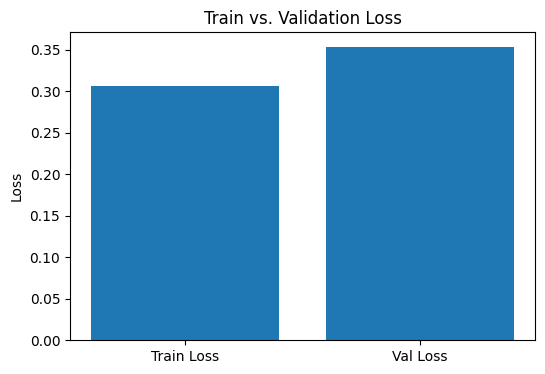

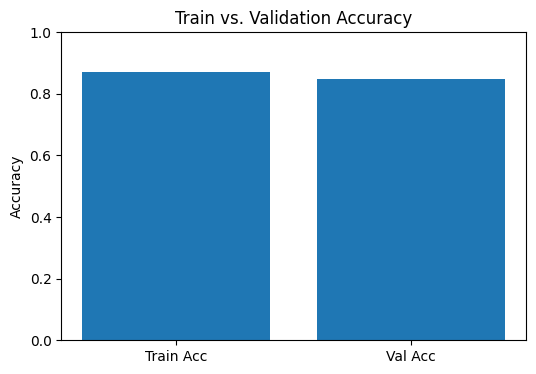

In [31]:
# Measure Over/Underfitting on Final Model + Plots

import torch
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 1) Build train DataLoader
train_eval_ld = DataLoader(
    SentimentDataset(train, tokenizer, ML),
    batch_size=32, shuffle=False
)

# 2) Inference on train set
model.eval()
train_preds, train_labels, train_losses = [], [], []
with torch.no_grad():
    for batch in train_eval_ld:
        ids   = batch['input_ids'].to(DEVICE)
        mask  = batch['attention_mask'].to(DEVICE)
        labs  = batch['labels'].to(DEVICE)
        out   = model(ids, attention_mask=mask, labels=labs)
        train_losses.append(out.loss.item())
        preds = torch.argmax(out.logits, dim=1)
        train_preds.extend(preds.cpu().tolist())
        train_labels.extend(labs.cpu().tolist())

# 3) Compute averages and validation from previous
train_loss_avg = sum(train_losses) / len(train_losses)
train_acc      = accuracy_score(train_labels, train_preds)
val_loss_avg   = val_losses[-1]
val_acc_avg    = val_accs[-1]
loss_gap       = val_loss_avg - train_loss_avg
acc_gap        = train_acc - val_acc_avg

# 4) Print summary
print(f"🏷️ Train  → loss: {train_loss_avg:.4f}, acc: {train_acc:.4f}")
print(f"🏷️ Val    → loss: {val_loss_avg:.4f}, acc: {val_acc_avg:.4f}")
print(f"🔍 Loss gap (val – train): {loss_gap:.4f}")
print(f"🔍 Acc gap  (train – val): {acc_gap:.4f}")

# 5) Plotting the gaps
plt.figure(figsize=(6,4))
plt.bar(['Train Loss','Val Loss'], [train_loss_avg, val_loss_avg])
plt.title('Train vs. Validation Loss')
plt.ylabel('Loss')
plt.show()

plt.figure(figsize=(6,4))
plt.bar(['Train Acc','Val Acc'], [train_acc, val_acc_avg])
plt.title('Train vs. Validation Accuracy')
plt.ylim(0,1)
plt.ylabel('Accuracy')
plt.show()


In [29]:
# Final Model on train+val → Test Submission

import torch
from torch.optim import AdamW
from torch.cuda.amp import autocast, GradScaler
from torch.utils.data import DataLoader
import pandas as pd

# Combine train + val
full_df = pd.concat([train, validation], ignore_index=True)
full_ds = SentimentDataset(full_df, tokenizer, ML)
full_ld = DataLoader(full_ds, batch_size=BS, shuffle=True)

# New model instance
model = BertForSequenceClassification.from_pretrained(MODEL_NAME, config=config).to(DEVICE)
# Hidden-layer head
model.classifier = nn.Sequential(
    nn.Linear(config.hidden_size, inter),
    nn.ReLU(),
    nn.Dropout(DROP),
    nn.Linear(inter, config.num_labels),
).to(DEVICE)

# Optimizer, scheduler, scaler
optim = AdamW(model.parameters(), lr=LR, weight_decay=WD)
total_steps = len(full_ld) * 1
sched = get_linear_schedule_with_warmup(optim, int(0.1*total_steps), total_steps)
scaler = GradScaler()

# Train 1 epoch on full data
model.train()
for batch in full_ld:
    optim.zero_grad()
    ids, mask, labs = (batch[k].to(DEVICE) for k in ['input_ids','attention_mask','labels'])
    with autocast():
        loss = model(ids, attention_mask=mask, labels=labs).loss
    scaler.scale(loss).backward()
    scaler.step(optim); scaler.update(); sched.step()
print("✅ Final model trained on train+val.")

# Batched inference on test
class TestDataset(torch.utils.data.Dataset):
    def __init__(self, texts, tokenizer, max_length):
        self.texts = texts
        self.tokenizer = tokenizer
        self.max_length = max_length
    def __len__(self): return len(self.texts)
    def __getitem__(self, idx):
        enc = self.tokenizer(
            self.texts[idx],
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt'
        )
        return {'input_ids': enc['input_ids'].squeeze(0),
                'attention_mask': enc['attention_mask'].squeeze(0)}

torch.cuda.empty_cache()
test_ds = TestDataset(test['Text_clean'].tolist(), tokenizer, ML)
test_ld = DataLoader(test_ds, batch_size=32)

model.eval()
all_preds = []
with torch.no_grad():
    for batch in test_ld:
        logits = model(batch['input_ids'].to(DEVICE),
                       attention_mask=batch['attention_mask'].to(DEVICE)).logits
        all_preds.extend(torch.argmax(logits, dim=1).cpu().numpy())

# Write submission.csv
submission = pd.DataFrame({"ID": test["ID"], "Label": all_preds})
submission.to_csv("submission.csv", index=False)
print("✅ submission.csv created.")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_35/2471468728.py:28: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
/tmp/ipykernel_35/2471468728.py:35: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


✅ Final model trained on train+val.
✅ submission.csv created.
